In [1]:
import netCDF4 as nc
from cartopy import crs as ccrs
from matplotlib import pyplot as plt
import pygrib

In [2]:
nc_data = nc.Dataset('../Interpolation/allDataInterpolated.nc')

In [3]:
vars_nc = []

In [4]:
for v in nc_data.variables:
    if v != 'time' and v != 'level' and v != 'lat' and v != 'lon':
        vars_nc.append(v)

In [5]:
vars_nc

['air', 'uwnd', 'hgt', 'vwnd', 'omega', 'rhum']

In [6]:
def grib_var(nc_var):
    if nc_var == 'air':
        return 'Temperature'
    elif nc_var == 'uwnd':
        return 'U component of wind'
    elif nc_var == 'vwnd':
        return 'V component of wind'
    elif nc_var == 'rhum':
        return 'Relative humidity'
    elif nc_var == 'hgt':
        return 'Geopotential height'
    elif nc_var == 'omega':
        return 'Vertical velocity'
    else:
        return None

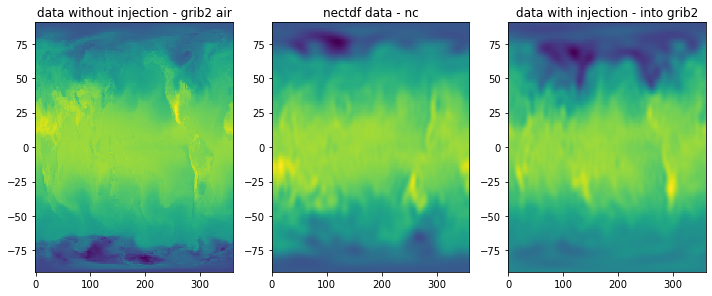

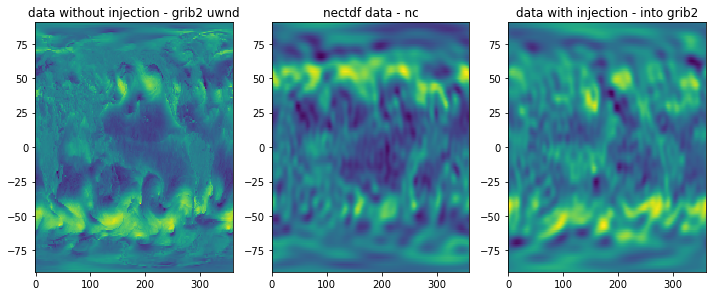

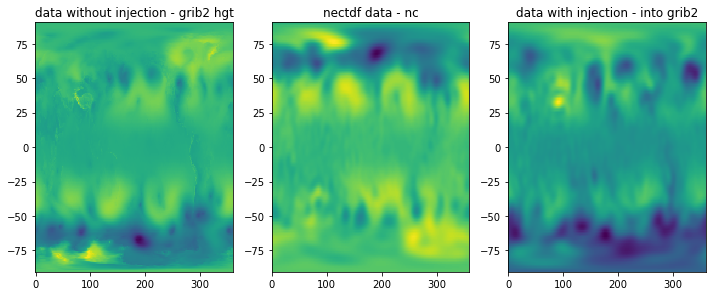

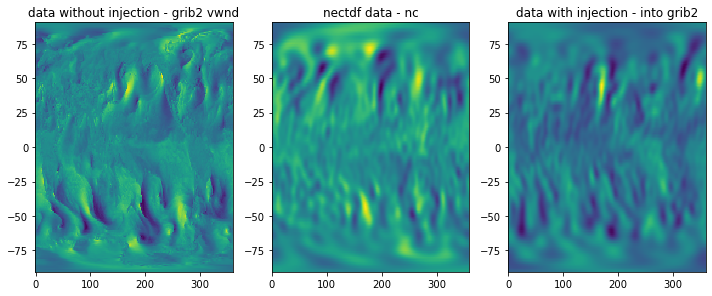

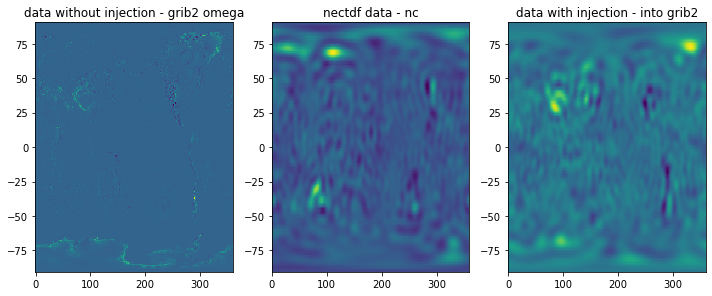

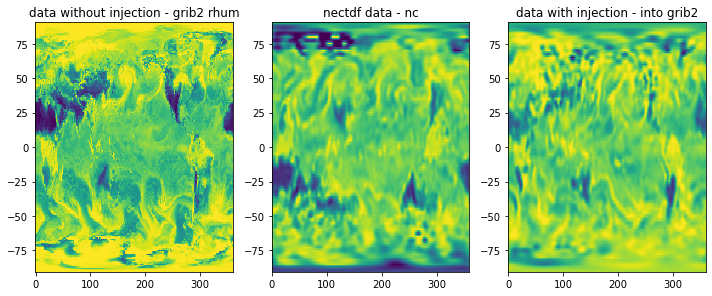

In [8]:
for v in vars_nc:
    values_var_nc = nc_data[v][0,0]
    lons_nc = nc_data.variables['lon'][:]
    lats_nc = nc_data.variables['lat'][:]
    base_grbs = pygrib.open('../../workspace/wrfda-test/grib-data/fnl_20220424_00_00.grib2')
    for i, grb in enumerate(base_grbs):
        if grb.name == grib_var(v) and grb.level == 1000 and grb.typeOfLevel == 'isobaricInhPa':
            break
    base_grib = base_grbs[i+1]
    interp_grbs = pygrib.open('../../workspace/wrfda-injected/fnl_20220424_00_00.grib2')
    interp_grb = interp_grbs[i+1]
    values_var_grb = base_grib.values.data
    lats_grib, lons_grib = base_grib.latlons()
    lons_grib = lons_grib[1,:]
    lats_grib = lats_grib[:,1]
    values_var_interp_grb = interp_grb.values.data
    lats_interp_grb, lons_interp_grb = interp_grb.latlons()
    lons_interp_grb = lons_interp_grb[1,:]
    lats_interp_grb = lats_interp_grb[:,1]
    fig, axes = plt.subplots(ncols=3, figsize=(10,4))
    axes[0].plot(projection=ccrs.PlateCarree())
    z = axes[0].pcolormesh(lons_grib, lats_grib, values_var_grb, cmap = 'viridis')
    axes[2].plot(projection=ccrs.PlateCarree())
    z = axes[2].pcolormesh(lons_nc, lats_nc, values_var_nc, cmap = 'viridis')
    axes[1].plot(projection=ccrs.PlateCarree())
    z = axes[1].pcolormesh(lons_interp_grb, lats_interp_grb, values_var_interp_grb, cmap = 'viridis')
    fig.tight_layout()
    axes[0].set_title(f'data without injection - grib2 {v}')
    axes[1].set_title('nectdf data - nc')
    axes[2].set_title('data with injection - into grib2')
    plt.show()
    base_grbs.close()
    interp_grbs.close()


In [9]:
nc_data.close()